In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import pyprojroot
import seaborn as sns

In [15]:
def inspect_acc(fits_source_df,
                 net_name,
                 method,
                 source_dataset,
                 figsize=(12, 4),
                 ylim=(0.4, 1.05),
                 axes_title=True,
                 suptitle=True,
                 xylabel=True,
                ):
    this_fits_source_df = fits_source_df[
        (fits_source_df.net_name == net_name) &
        (fits_source_df.method == method) & 
        (fits_source_df.source_dataset == source_dataset)       
    ]

    for net_number_ind, net_number in enumerate(this_fits_source_df.net_number.unique()):
        fig, ax = plt.subplots(1, 4, figsize=figsize)
        ax = ax.ravel()

        for set_size_ind, set_size in enumerate(this_fits_source_df.set_size.unique()):
            source_set_size_df = this_fits_source_df[
                this_fits_source_df.set_size == set_size
            ]

            source_net_num_df = source_set_size_df[
                source_set_size_df.net_number == net_number
            ]

            discrim_pct = source_net_num_df.discrim_pct.values
            acc = source_net_num_df.accuracy.values

            ax[set_size_ind].plot(discrim_pct, acc, marker='o', linestyle='None')

            if axes_title:
                ax[set_size_ind].set_title(f"set size: {set_size}")

            ax[set_size_ind].set_xlabel('')
            ax[set_size_ind].set_ylabel('')
            ax[set_size_ind].set_ylim(ylim)

            if xylabel:
                # add a big axis, hide frame
                big_ax = fig.add_subplot(111, frameon=False)
                # hide tick and tick label of the big axis
                big_ax.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
                big_ax.grid(False)

                big_ax.set_xlabel('target-distractor discriminability (%)')
                big_ax.set_ylabel('accuracy')

            if suptitle:
                suptitle = fig.suptitle(f'{net_name} trained on {source_dataset}, replicate {net_number}', y=0.95)

            fig.tight_layout()

In [5]:
SOURCE_DATASETS_TO_USE = (
    'None',
    'search stimuli (classify)',
    'ImageNet',
    'Stylized ImageNet',
    'DomainNet, Clipart domain',
)

NET_NAMES = (
    'alexnet',
    'VGG16'
)

In [6]:
RESULTS_ROOT = pyprojroot.here() / 'results' / 'searchstims' / 'source_data' / 'discriminability'

In [7]:
STIM_TYPES = (
    'rvg',
    'tvt'
)

In [12]:
source_fits_dfs = {}
fits_dfs = {}

for stim_type in STIM_TYPES:
    source_fits_dfs[stim_type] = pd.read_csv(RESULTS_ROOT / f'source_fits_{stim_type}.csv')

## what do the fits look like?

In [13]:
sns.set()

#### Inspect fits of discrimination experiment where distractors are Vertical T and target is T rotated 90 degrees 
where we vary rotation of target T

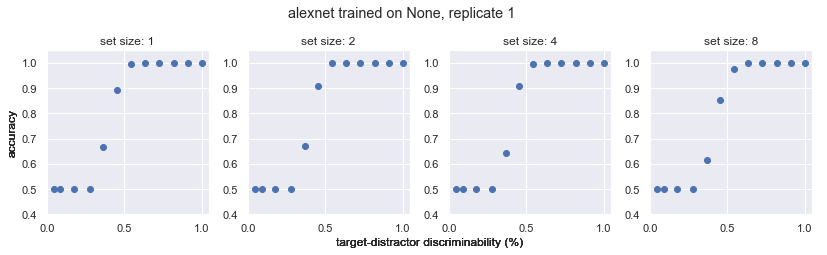

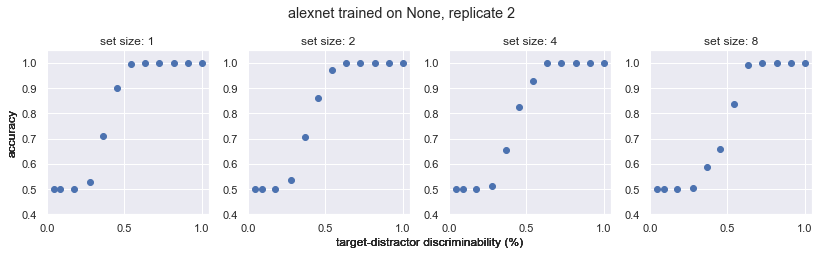

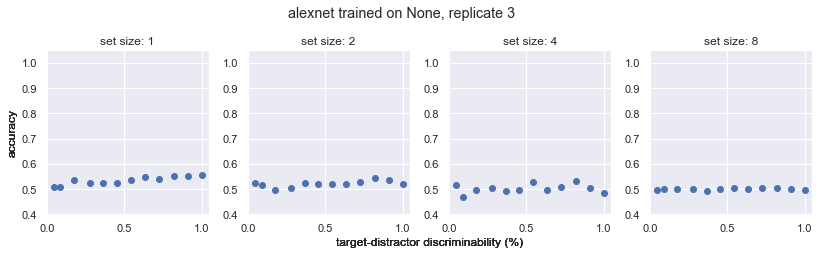

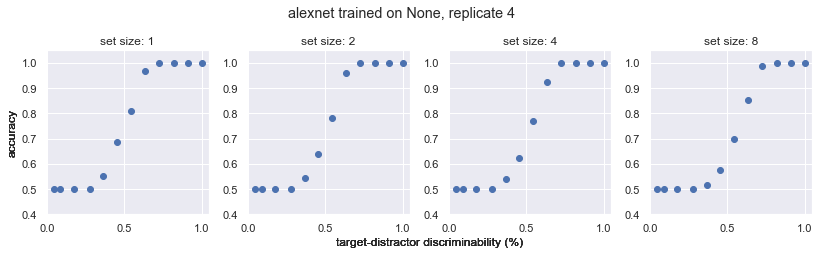

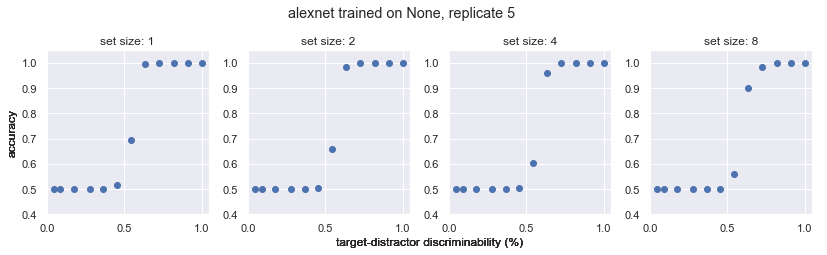

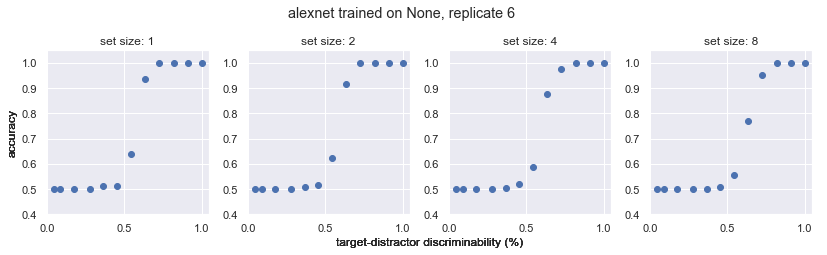

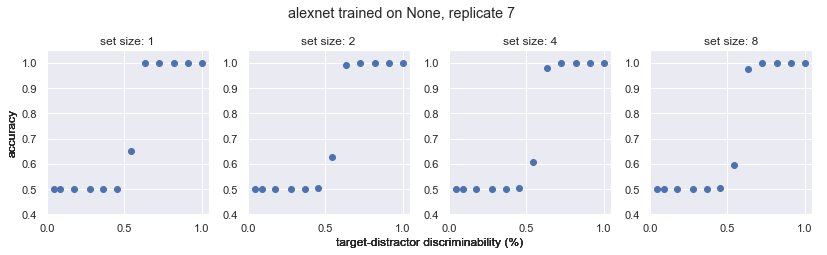

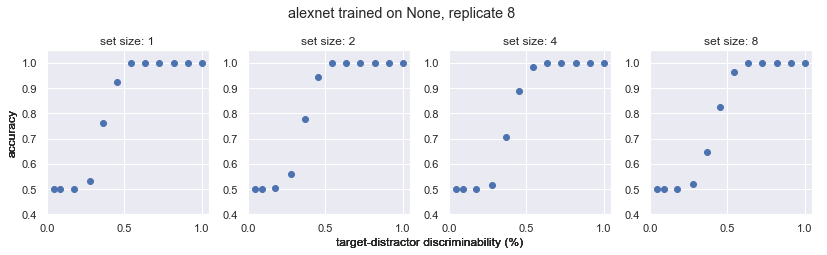

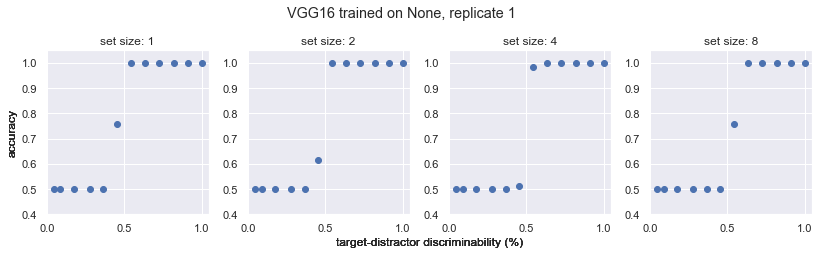

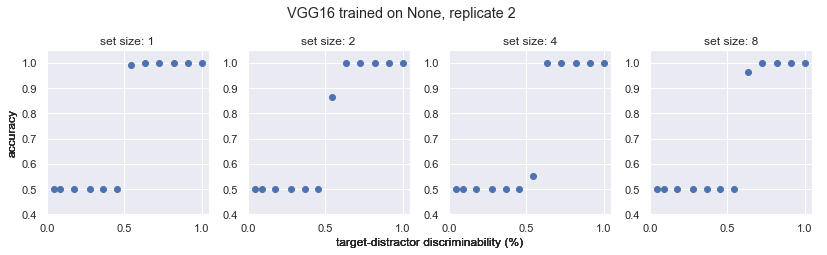

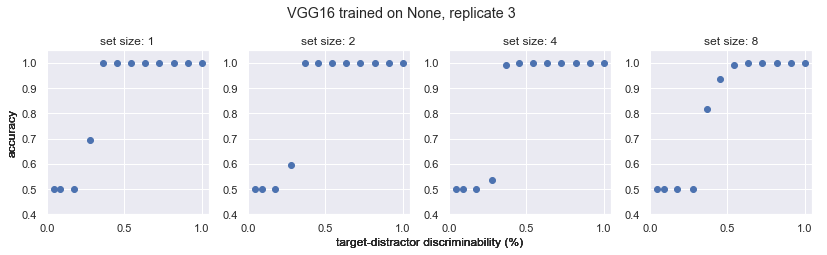

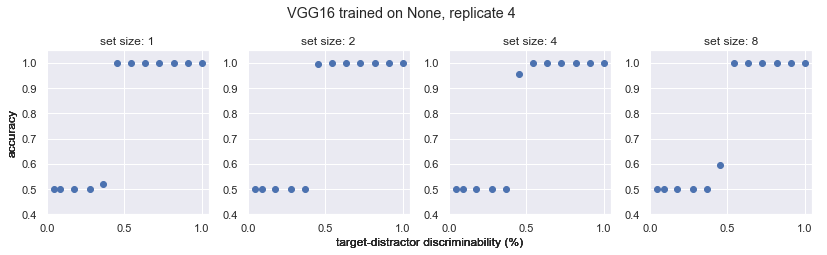

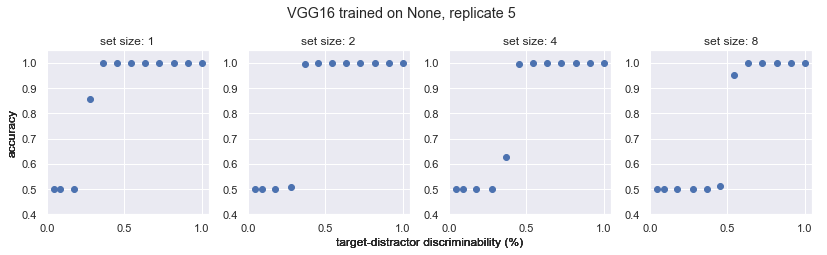

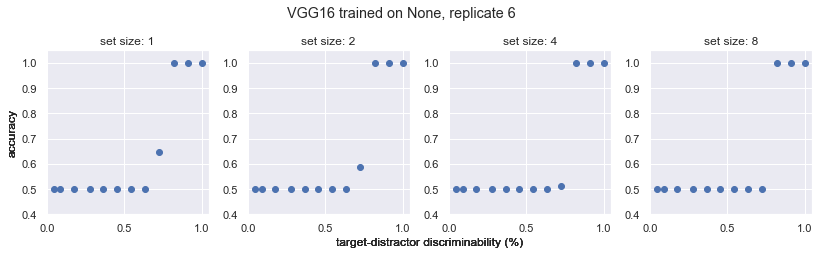

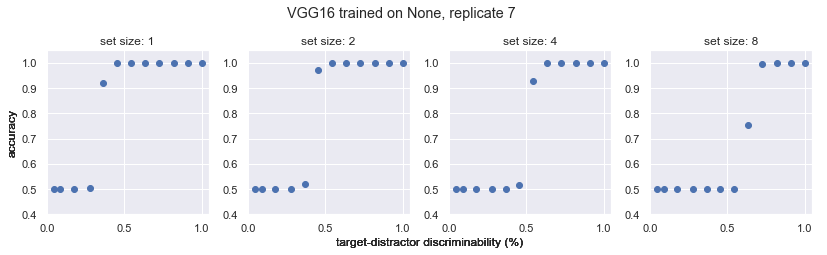

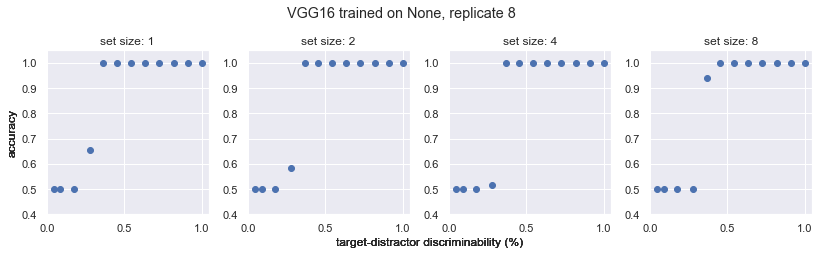

In [16]:
for source_dataset in SOURCE_DATASETS_TO_USE:
    if source_dataset == 'None':
        method = 'initialize'
    else:
        break
        # method = 'transfer'

    for net_name in NET_NAMES:
        inspect_acc(fits_source_df=source_fits_dfs['tvt'],
                    net_name=net_name,
                    method=method,
                    source_dataset=source_dataset)

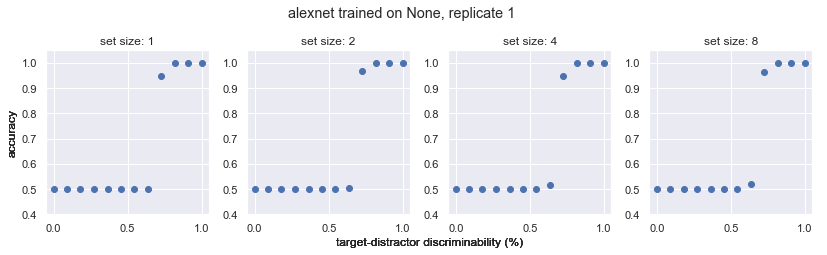

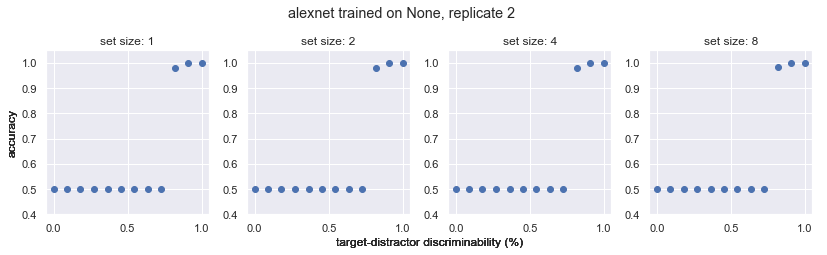

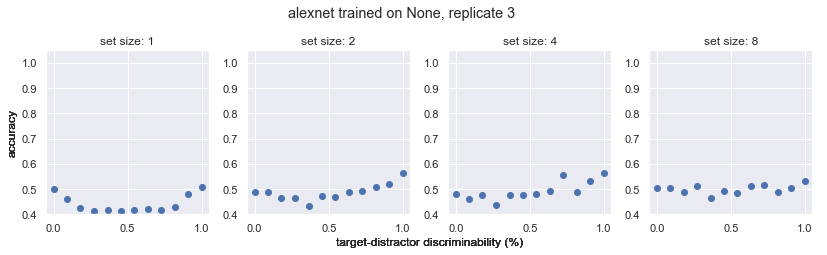

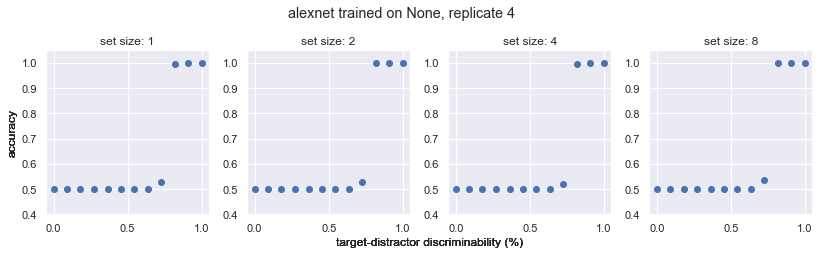

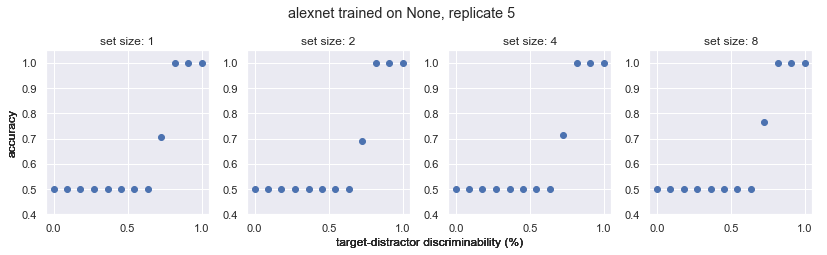

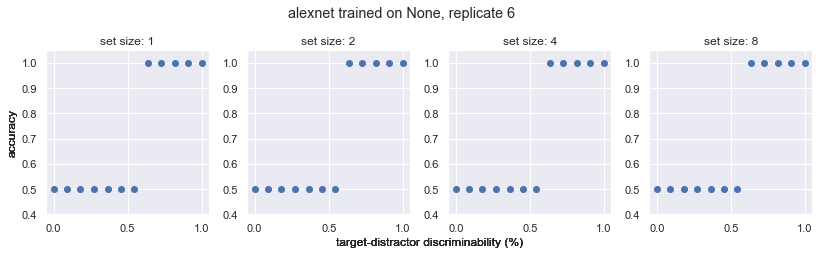

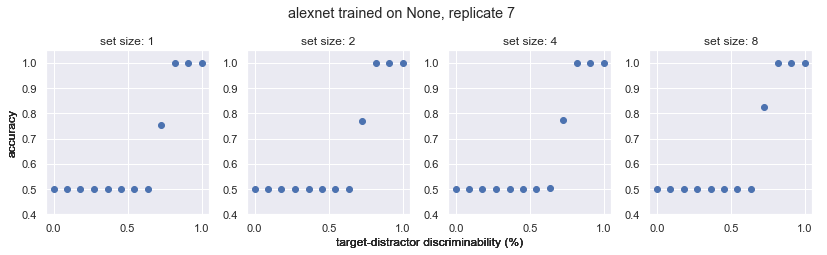

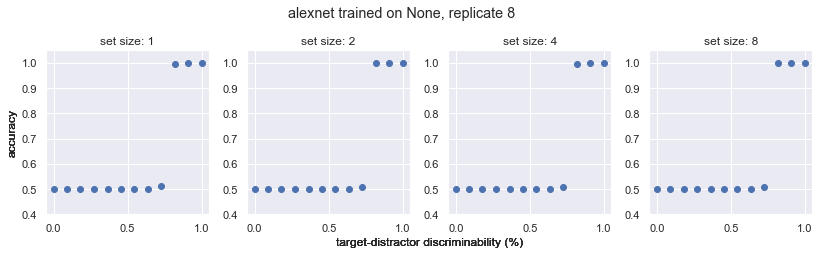

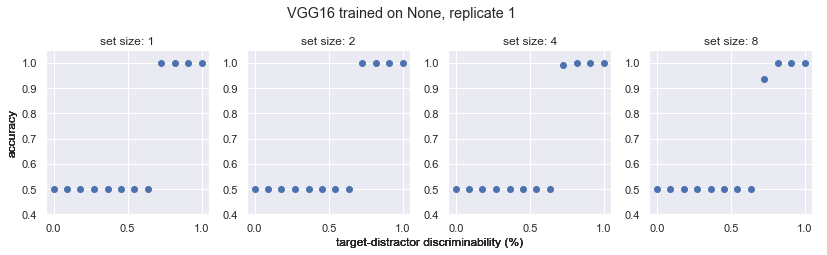

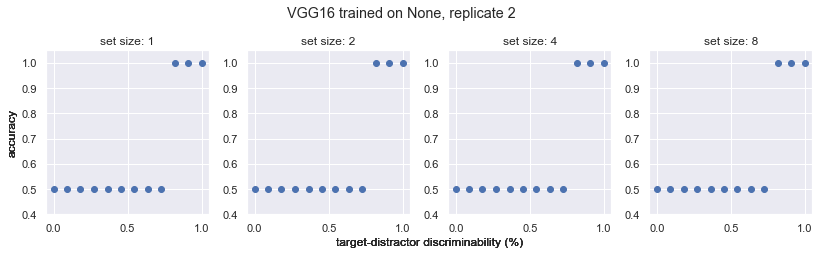

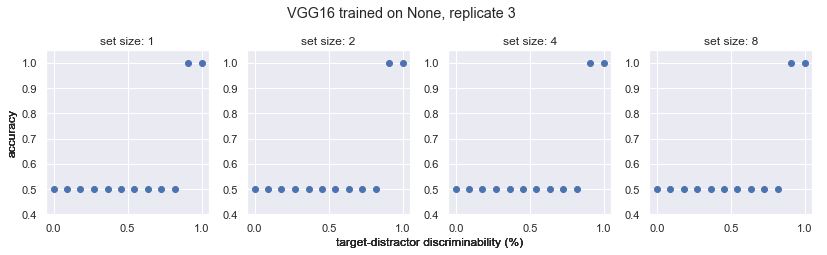

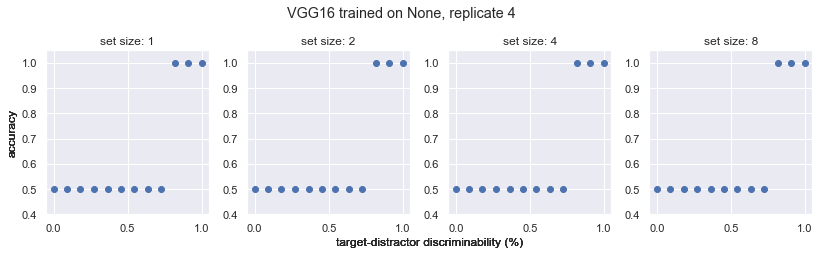

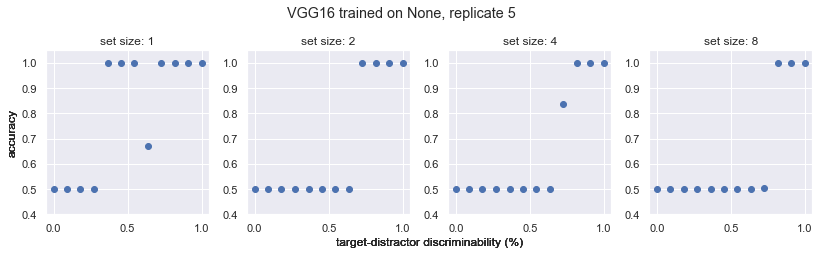

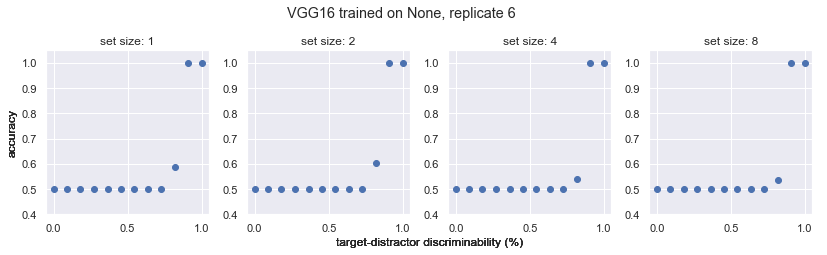

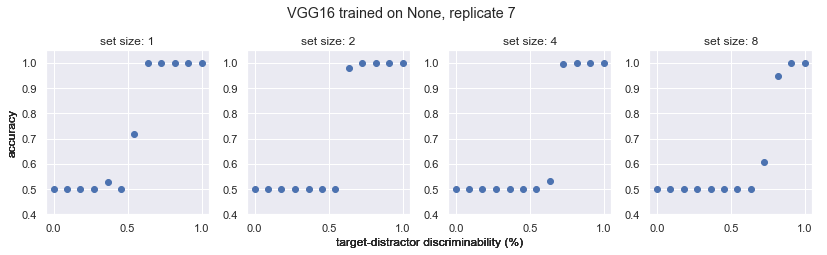

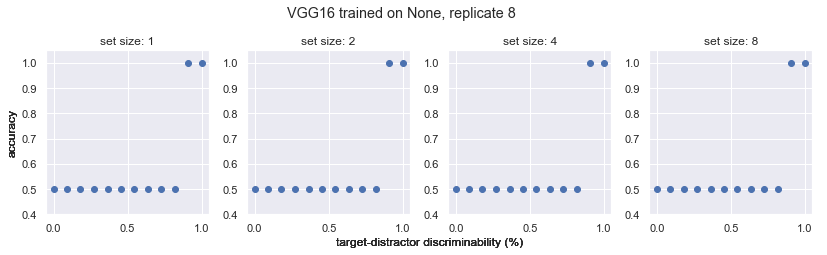

In [18]:
for source_dataset in SOURCE_DATASETS_TO_USE:
    if source_dataset == 'None':
        method = 'initialize'
    else:
        break
        # method = 'transfer'

    for net_name in NET_NAMES:
        inspect_acc(fits_source_df=source_fits_dfs['rvg'],
                    net_name=net_name,
                    method=method,
                    source_dataset=source_dataset)